In [1]:
import pandas as pd
from pandas.tseries.offsets import *
import requests
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import statsmodels


link = "https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newDeaths28DaysByDeathDate&format=csv"
f = requests.get(link)

with open("uk_deaths.csv","w+") as out:
    out.seek(0)
    out.write(f.text)
    out.truncate()
data = pd.read_csv("uk_deaths.csv")
data.dropna()#There are nan values in feb before deaths started and yesterday where reporting isn't complete
data=data[::-1].reset_index()#Results are indexed backwards in time
data["rolling_deaths"]=data["newDeaths28DaysByDeathDate"].rolling(7).mean()

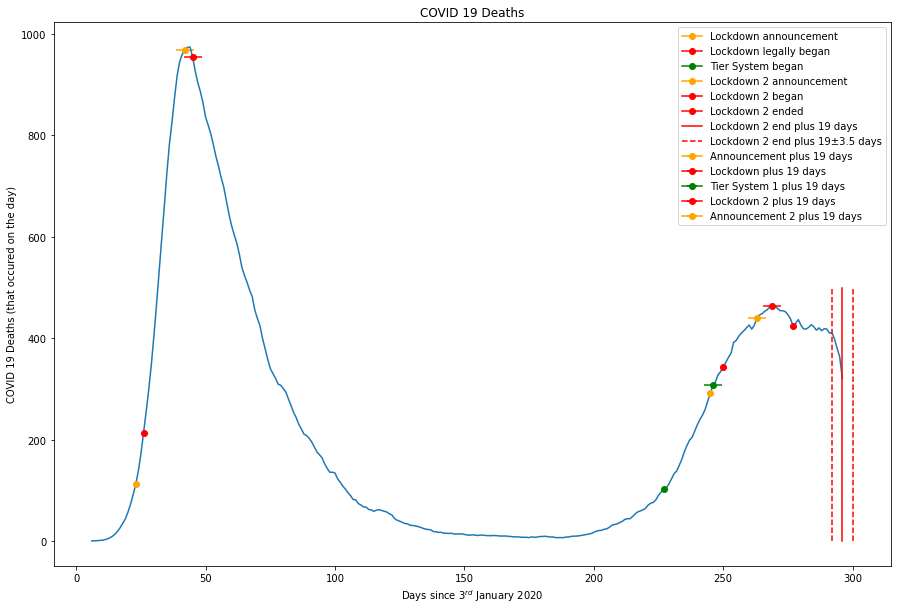

In [4]:
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(data["rolling_deaths"])

plt.plot(data.loc[data['date'] == "2020-03-23"]["rolling_deaths"],marker='o',label="Lockdown announcement",color="Orange")
plt.plot(data.loc[data['date'] == "2020-03-26"]["rolling_deaths"],marker='o',label="Lockdown legally began",color="red")
#plt.plot(data.loc[data['date'] == "2020-05-13"]["rolling_deaths"],marker='o',label="Initial easing of measures")
#plt.plot(data.loc[data['date'] == "2020-09-14"]["rolling_deaths"],marker='o',label="6 person rule began")
plt.plot(data.loc[data['date'] == "2020-10-13"]["rolling_deaths"],marker='o',label="Tier System began",color="green")
plt.plot(data.loc[data['date'] == "2020-10-31"]["rolling_deaths"],marker='o',label="Lockdown 2 announcement",color="Orange")
plt.plot(data.loc[data['date'] == "2020-11-05"]["rolling_deaths"],marker='o',label="Lockdown 2 began",color="red")
plt.plot(data.loc[data['date'] == "2020-12-02"]["rolling_deaths"],marker='o',label="Lockdown 2 ended",color="red")

plt.errorbar(data.index[data['date'] == "2020-04-11"],data.loc[data['date'] == "2020-04-11"]["rolling_deaths"].values[0], xerr=3.5,marker="o",label="Announcement plus 19 days",color="Orange")
plt.errorbar(data.index[data['date'] == "2020-04-14"],data.loc[data['date'] == "2020-04-14"]["rolling_deaths"].values[0], xerr=3.5,marker="o",label="Lockdown plus 19 days",color="red")
plt.errorbar(data.index[data['date'] == "2020-11-01"],data.loc[data['date'] == "2020-11-01"]["rolling_deaths"].values[0], xerr=3.5,marker="o",label="Tier System 1 plus 19 days",color="green")
plt.errorbar(data.index[data['date'] == "2020-11-24"],data.loc[data['date'] == "2020-11-24"]["rolling_deaths"].values[0], xerr=3.5,marker="o",label="Lockdown 2 plus 19 days",color="red")
plt.errorbar(data.index[data['date'] == "2020-11-18"],data.loc[data['date'] == "2020-11-18"]["rolling_deaths"].values[0], xerr=3.5,marker="o",label="Announcement 2 plus 19 days",color="orange")
#plt.errorbar(data.index[data['date'] == "2020-11-18"],data.loc[data['date'] == "2020-12-21"]["rolling_deaths"].values[0], xerr=3.5,marker="o",label="Lockdown 2 end plus 19 days",color="red")

plt.plot([353-57,353-57],[0,500],color="red",label="Lockdown 2 end plus 19 days")
plt.plot([353-4-57,353-4-57],[0,500],"--",color="red",label="Lockdown 2 end plus 19±3.5 days")
plt.plot([353+4-57,353+4-57],[0,500],"--",color="red")
plt.xlabel("Days since 3$^{rd}$ January 2020")
plt.ylabel("COVID 19 Deaths (that occured on the day)")
plt.title("COVID 19 Deaths")

plt.legend()

18.5±3.5 days is average days to death from [here](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30566-3/fulltext#tbl2).

In [3]:
data

,index,date,areaType,areaCode,areaName,newDeaths28DaysByDeathDate,rolling_deaths
0,296,2020-02-29,overview,K02000001,United Kingdom,0,NaN
1,295,2020-03-01,overview,K02000001,United Kingdom,0,NaN
2,294,2020-03-02,overview,K02000001,United Kingdom,1,NaN
3,293,2020-03-03,overview,K02000001,United Kingdom,2,NaN
4,292,2020-03-04,overview,K02000001,United Kingdom,0,NaN
...,...,...,...,...,...,...,...
292,4,2020-12-17,overview,K02000001,United Kingdom,442,410.857143
293,3,2020-12-18,overview,K02000001,United Kingdom,336,398.571429
294,2,2020-12-19,overview,K02000001,United Kingdom,288,380.142857
295,1,2020-12-20,overview,K02000001,United Kingdom,252,363.428571
